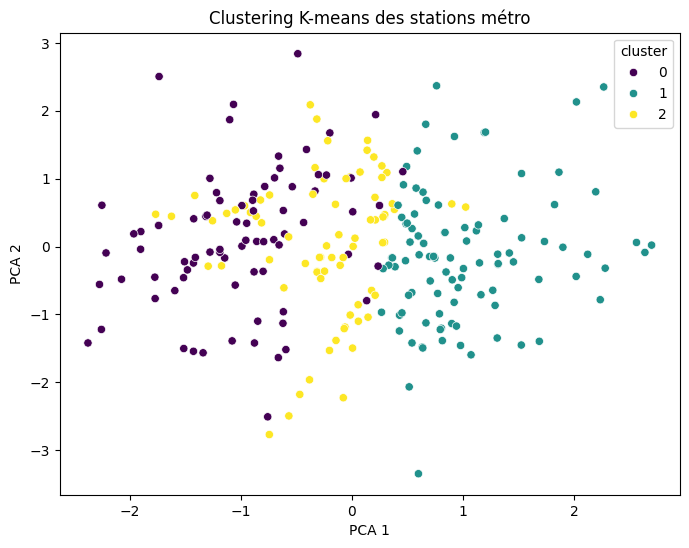

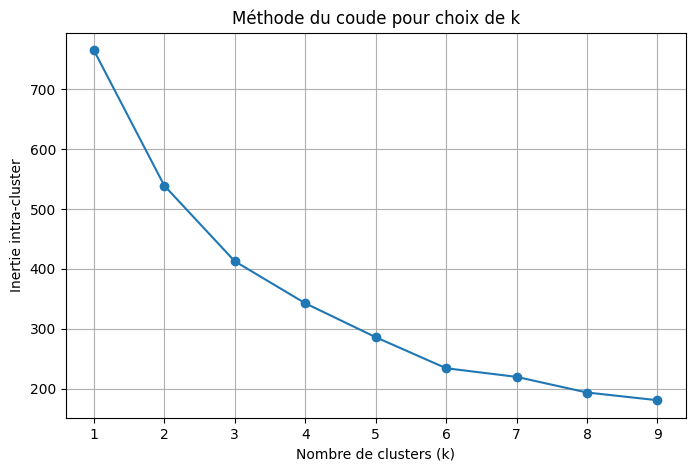

In [11]:

# Notebook: Analyse K-means Pollution
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Chargement des données
# Localisation du fichier train.csv
base_dir = os.path.dirname(os.getcwd())  # monte d’un niveau
csv_path = os.path.join(base_dir, "Data", "processed", "train.csv")

# Chargement du CSV
df = pd.read_csv(csv_path)
df = df[df['niveau_pollution'] != 'pas de données']

# Encodage des niveaux de pollution
pollution_mapping = {
    'pollution faible': 1,
    'pollution moyenne': 2,
    'pollution élevée': 3
}
df['pollution_num'] = df['niveau_pollution'].map(pollution_mapping)

# Colonnes numériques
features = ['pollution_num', 'stop_lon', 'stop_lat']
df_clean = df[features].dropna()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

#déterminer le bon nombre de clusters
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

# Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('Clustering K-means des stations métro')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude pour choix de k")
plt.grid(True)
plt.show()
